<a href="https://colab.research.google.com/github/YunhwanJacobLee/AIFFEL_quest_cr/blob/main/Project/Project_02(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트(1 - 3) : digits, wine, breaset_cancer

## (1) load_digits : 손글씨 분류

In [26]:
import sklearn

print(sklearn.__version__)

1.6.0


In [73]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [58]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [59]:
# Feature Data 지정하기
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


In [60]:
# Label Data 지정하기
digits_label = digits.target

# 1796 rows x 1 columns
print(digits_label.shape)

(1797,)


In [115]:
df_class_counts = pd.DataFrame(pd.Series(digits.target).value_counts())
df_class_counts.sort_index()

,count
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174
9,180


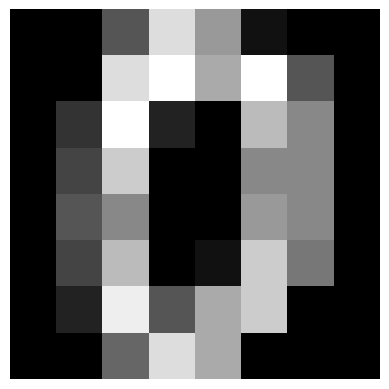

In [74]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

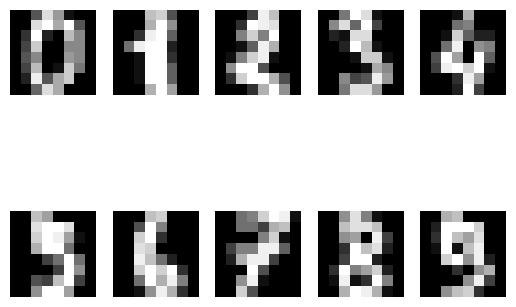

In [75]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
  plt.axis('off')
plt.show()

In [61]:
# Target Names 출력
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [62]:
# 데이터 Describe
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [64]:
# X_train, X_test, y_train, y_test를 생성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_df, digits_label, test_size=0.2, random_state=7)
print(len(X_train), len(X_test))

1437 360


In [76]:
# Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 호출
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 평가 지표 호출
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ML algorithmes (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC(random_state=32)
sgd_model = SGDClassifier(random_state=32)
logistic_model = LogisticRegression()

# 학습
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Model Prediction
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
svm_model_pred = svm_model.predict(X_test)
sgd_model_pred = sgd_model.predict(X_test)
logistic_model_pred = logistic_model.predict(X_test)


# Model evaluation
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("\n***** Decision Tree *****")
print("confussion matrix")
print(decision_tree_conf_matrix)
print("\n")
print("Decision Tree:",decision_tree_accuracy*100,'\n')
print(classification_report(y_test,decision_tree_pred))

random_forest_conf_matrix = confusion_matrix(y_test, random_forest_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("\n***** Random Forest *****")
print("confussion matrix")
print(random_forest_conf_matrix)
print("\n")
print("Random Forest:",random_forest_accuracy*100,'\n')
print(classification_report(y_test,random_forest_pred))

svm_model_conf_matrix = confusion_matrix(y_test, svm_model_pred)
svm_model_accuracy = accuracy_score(y_test, svm_model_pred)
print("\n***** Support Vector Machine *****")
print("confussion matrix")
print(svm_model_conf_matrix)
print("\n")
print("Support Vector Machine:",svm_model_accuracy*100,'\n')
print(classification_report(y_test,svm_model_pred))

sgd_model_conf_matrix = confusion_matrix(y_test, sgd_model_pred)
sgd_model_accuracy = accuracy_score(y_test, sgd_model_pred)
print("\n***** SGD Classifier *****")
print("confussion matrix")
print(sgd_model_conf_matrix)
print("\n")
print("SGD Classifier:",sgd_model_accuracy*100,'\n')
print(classification_report(y_test,sgd_model_pred))

logistic_model_conf_matrix = confusion_matrix(y_test, logistic_model_pred)
logistic_model_accuracy = accuracy_score(y_test, logistic_model_pred)
print("\n***** Logistic Regression *****")
print("confussion matrix")
print(logistic_model_conf_matrix)
print("\n")
print("Logistic Regression:",logistic_model_accuracy*100,'\n')
print(classification_report(y_test,logistic_model_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



***** Decision Tree *****
confussion matrix
[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  5  4  1  1  0  3  0 28  1]
 [ 0  1  1  2  2  1  0  0  0 25]]


Decision Tree: 85.55555555555556 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78   

### * 주관적 모델 평가 1.

1. 다양한 클래스들 간에 비율이 비슷하지만, 차이가 있기때문에 정확도가 아닌, sklearn.metrics에서 confusion matrix 기반의 classification report가 적절하다고 생각됨.   
2. 다양한 ML 알고리즘 중에서 SVM의 정확도가 가장 높게 나타났으며, 클래스간 불균형을 고려한 weighted avg 점수에서 precision, recall 특히, f1-score가 0.99로 상당히 높게 나타남.    
3. 전체의 알고리즘에서 개별적으로 손글씨를 평가할 때, 대체적으로 숫자 8을 1로 예측하는 경우가 꽤 있음. 본인 생각으로는 이해가 가지 않음.

## (2) load_wine : 와인 분류

In [77]:
from sklearn.datasets import load_wine

In [78]:
wine = load_wine()
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [79]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [81]:
wine_data = wine.data
print(wine_data.shape)

(178, 13)


In [83]:
wine_label = wine.target
print(wine_label.shape)

(178,)


In [84]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [85]:
# target_names로만으로는 각 class가 어떤 것을 의미하는지 잘 모름.
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [98]:
df_class_counts = pd.DataFrame(pd.Series(wine.target).value_counts())
df_class_counts

,count
1,71
0,59
2,48


In [86]:
# 데이터 Describe
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [89]:
# X_train, X_test, y_train, y_test를 생성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df, wine_label, test_size=0.2, random_state=7)
print(len(X_train), len(X_test))

142 36


In [90]:
# Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 호출
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 평가 지표 호출
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ML algorithmes (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC(random_state=32)
sgd_model = SGDClassifier(random_state=32)
logistic_model = LogisticRegression()

# 학습
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Model Prediction
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
svm_model_pred = svm_model.predict(X_test)
sgd_model_pred = sgd_model.predict(X_test)
logistic_model_pred = logistic_model.predict(X_test)


# Model evaluation
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("\n***** Decision Tree *****")
print("confussion matrix")
print(decision_tree_conf_matrix)
print("\n")
print("Decision Tree:",decision_tree_accuracy*100,'\n')
print(classification_report(y_test,decision_tree_pred))

random_forest_conf_matrix = confusion_matrix(y_test, random_forest_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("\n***** Random Forest *****")
print("confussion matrix")
print(random_forest_conf_matrix)
print("\n")
print("Random Forest:",random_forest_accuracy*100,'\n')
print(classification_report(y_test,random_forest_pred))

svm_model_conf_matrix = confusion_matrix(y_test, svm_model_pred)
svm_model_accuracy = accuracy_score(y_test, svm_model_pred)
print("\n***** Support Vector Machine *****")
print("confussion matrix")
print(svm_model_conf_matrix)
print("\n")
print("Support Vector Machine:",svm_model_accuracy*100,'\n')
print(classification_report(y_test,svm_model_pred))

sgd_model_conf_matrix = confusion_matrix(y_test, sgd_model_pred)
sgd_model_accuracy = accuracy_score(y_test, sgd_model_pred)
print("\n***** SGD Classifier *****")
print("confussion matrix")
print(sgd_model_conf_matrix)
print("\n")
print("SGD Classifier:",sgd_model_accuracy*100,'\n')
print(classification_report(y_test,sgd_model_pred))

logistic_model_conf_matrix = confusion_matrix(y_test, logistic_model_pred)
logistic_model_accuracy = accuracy_score(y_test, logistic_model_pred)
print("\n***** Logistic Regression *****")
print("confussion matrix")
print(logistic_model_conf_matrix)
print("\n")
print("Logistic Regression:",logistic_model_accuracy*100,'\n')
print(classification_report(y_test,logistic_model_pred))


***** Decision Tree *****
confussion matrix
[[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]


Decision Tree: 94.44444444444444 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


***** Random Forest *****
confussion matrix
[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]


Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


***** Suppo

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

### * 주관적 모델 평가 2.

1. mnist 데이터 분석과 마찬가지로, class(1, 2, 3)의 비율이 다른 것을 확인함. 하지만, target_names로만으로는 각 class가 어떤 것을 의미하는지 잘 모르기 때문에 분석에 대한 정확한 해석이 어려움.
2. 1과 마찬가지로 confusion_matrix 기반의 classification report를 통해 분석하는 것이 좋을 것이라고 생각됨.      
3. 여러 ML 알고리즘을 비교한 결과, Random Forest에서 정확도, 정밀도, 재현율, f1-score에서 완벽한 성능을 확인하였음.
4. 재미있는 것은, 성능이 낮게 나타난 SVM과 SGD에서 실제 class 3인데 2로 잘못 예측한(FN) 것이 11개나 됨. 2와 3 와인 간에 유사한 것이 뭔가 있을지 궁금함.
5. 선형 모델에서 성능이 매우 낮게 나타났는데, 선형 모델은 정규화 및 하이퍼파라미터 튜닝 후 성능을 확인하는 것도 필요한 것으로 보임.

## (3) load_breast_cancer : 유방함 여부 진단

In [102]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [105]:
cancer_data = cancer.data
print(cancer_data.shape)

(569, 30)


In [107]:
cancer_label = cancer.target
print(cancer_label.shape)

(569,)


In [108]:
# malignant: 악성(0), benign: 양성(1)
print(cancer.target_names)

['malignant' 'benign']


In [116]:
df_class_counts = pd.DataFrame(pd.Series(cancer.target).value_counts())
df_class_counts.sort_index()

,count
0,212
1,357


In [109]:
cancer_df = pd.DataFrame(data=cancer_data, columns = cancer.feature_names)
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [110]:
# X_train, X_test, y_train, y_test를 생성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_df, cancer_label, test_size=0.2, random_state=7)
print(len(X_train), len(X_test))

455 114


In [111]:
# Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 호출
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 평가 지표 호출
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ML algorithmes (Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC(random_state=32)
sgd_model = SGDClassifier(random_state=32)
logistic_model = LogisticRegression()

# 학습
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Model Prediction
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
svm_model_pred = svm_model.predict(X_test)
sgd_model_pred = sgd_model.predict(X_test)
logistic_model_pred = logistic_model.predict(X_test)


# Model evaluation
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("\n***** Decision Tree *****")
print("confussion matrix")
print(decision_tree_conf_matrix)
print("\n")
print("Decision Tree:",decision_tree_accuracy*100,'\n')
print(classification_report(y_test,decision_tree_pred))

random_forest_conf_matrix = confusion_matrix(y_test, random_forest_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("\n***** Random Forest *****")
print("confussion matrix")
print(random_forest_conf_matrix)
print("\n")
print("Random Forest:",random_forest_accuracy*100,'\n')
print(classification_report(y_test,random_forest_pred))

svm_model_conf_matrix = confusion_matrix(y_test, svm_model_pred)
svm_model_accuracy = accuracy_score(y_test, svm_model_pred)
print("\n***** Support Vector Machine *****")
print("confussion matrix")
print(svm_model_conf_matrix)
print("\n")
print("Support Vector Machine:",svm_model_accuracy*100,'\n')
print(classification_report(y_test,svm_model_pred))

sgd_model_conf_matrix = confusion_matrix(y_test, sgd_model_pred)
sgd_model_accuracy = accuracy_score(y_test, sgd_model_pred)
print("\n***** SGD Classifier *****")
print("confussion matrix")
print(sgd_model_conf_matrix)
print("\n")
print("SGD Classifier:",sgd_model_accuracy*100,'\n')
print(classification_report(y_test,sgd_model_pred))

logistic_model_conf_matrix = confusion_matrix(y_test, logistic_model_pred)
logistic_model_accuracy = accuracy_score(y_test, logistic_model_pred)
print("\n***** Logistic Regression *****")
print("confussion matrix")
print(logistic_model_conf_matrix)
print("\n")
print("Logistic Regression:",logistic_model_accuracy*100,'\n')
print(classification_report(y_test,logistic_model_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



***** Decision Tree *****
confussion matrix
[[33  7]
 [ 3 71]]


Decision Tree: 91.22807017543859 

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114


***** Random Forest *****
confussion matrix
[[40  0]
 [ 0 74]]


Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


***** Support Vector Machine *****
confussion matrix
[[29 11]
 [ 0 74]]


Support Vector Machine: 90.35087719298247 

              precision    recall  f1

### 주관적 모델 평가 3.

1. 생명과 관련이 있는 암이라는 카테고리 이진 분류 문제이기 때문에, 재현율(recall)이 중요하다고 생각됨. 즉, FN(악성인데 양성이라고 판단) 비율이 낮을 수록 모델의 좋은 평가를 받을 수 있음.  
2. Random Forest가 정확도 100으로 완벽한 성능을 나타냄.
3. 하지만, 대부분 알고리즘의 confusion matrix를 보면 FN이 생각보다 낮게 나타남(생명을 다루는 문제를 고려했을 때).
4. 따라서, breast_cancer 에서는 Random Forest로 개발된 모델을 사용해야함.